In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


In [2]:
years = list(range(2000, 2023))

#Years that will be used for data

In [3]:
url_start = "https://www.pro-football-reference.com/awards/awards_{}.htm#voting_apmvp"
#URL of MVP voting, will be looped to get the url for each year

In [4]:
for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("/Users/patricklauzon/mvpF/{}.html".format(year), "w+") as f:
        f.write(data.text)
#Copy the url and save it into the specified folder

In [5]:
with open("/Users/patricklauzon/mvpF/2000.html") as f:
    page = f.read()
#Read the 2000 MVP voting, this will be done to test

In [25]:
soup = BeautifulSoup(page, "html.parser")
#Use BeatifulSoup to parse the data

In [7]:
soup.find('tr', class_="over_header").decompose()
#Need to remove the header from the table

In [8]:
mvp_table = soup.find(id="voting_apmvp")
#Retrieve the table from the sheet

In [9]:
mvp_2000 = pd.read_html(str(mvp_table))[0]
#Test the table to see what cleaning needs to be done

In [10]:
mvp_2000

,Rk,Pos,Player,Tm,Votes,Share,G,GS,Cmp,Att,...,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Sk,Int.1
0,1,RB,Marshall Faulk,St. Louis Rams,24.0,48%,14,14,0,0,...,0,253,1359,18,81,830,8,0.0,0.0,0
1,2,QB,Donovan McNabb,Philadelphia Eagles,11.0,22%,16,16,330,569,...,13,86,629,6,2,5,0,0.0,0.0,0
2,3,RB,Eddie George,Tennessee Titans,8.0,16%,16,16,0,0,...,0,403,1509,14,50,453,2,0.0,0.0,0
3,4,QB,Rich Gannon,Oakland Raiders,5.0,10%,16,16,284,473,...,11,89,529,4,0,0,0,0.0,0.0,0
4,5,MLB,Ray Lewis,Baltimore Ravens,1.0,2%,16,16,0,0,...,0,0,0,0,0,0,0,108.0,3.0,2
5,6,QB,Peyton Manning,Indianapolis Colts,1.0,2%,16,16,357,571,...,15,37,116,1,0,0,0,NaN,0.0,0


In [11]:
mvp_2000 = mvp_2000.drop(mvp_2000[mvp_2000.Pos != str("QB")].index)
#Need to remove every column for MVP voting that doesn't include a QB, only comparing QB stats
#Comparing across positions would be too difficult due to different impact metrics 

In [12]:
mvp_2000

,Rk,Pos,Player,Tm,Votes,Share,G,GS,Cmp,Att,...,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Sk,Int.1
1,2,QB,Donovan McNabb,Philadelphia Eagles,11.0,22%,16,16,330,569,...,13,86,629,6,2,5,0,0.0,0.0,0
3,4,QB,Rich Gannon,Oakland Raiders,5.0,10%,16,16,284,473,...,11,89,529,4,0,0,0,0.0,0.0,0
5,6,QB,Peyton Manning,Indianapolis Colts,1.0,2%,16,16,357,571,...,15,37,116,1,0,0,0,NaN,0.0,0


In [13]:
dfs = []
for year in years:
    with open("/Users/patricklauzon/mvpF/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="voting_apmvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp = mvp.drop(mvp[mvp.Pos != str("QB")].index)
    mvp["Year"] = year
    
    dfs.append(mvp)
#Now have the info that we want, can loop through every year using the previous inputs and save them in an array
#This is saved as a Pandas Dataframe so that it can be saved and manipulated easier

In [14]:
mvps = pd.concat(dfs)
#Need to combine the info from every year

In [16]:
mvps.to_csv("mvpsF.csv")
#Save into an Excel sheet to allow further editing if needed

In [17]:
from selenium import webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
#Need to import Selenium to scrape info from a Javascript enabled site
#Without Selenium would only be able to retrieve part of the necessary info

[WDM] - Downloading: 100%|█████████████████| 8.79M/8.79M [00:00<00:00, 49.0MB/s]


In [19]:
player_stats_url = "https://www.pro-football-reference.com/years/{}/passing.htm"
#Going toi retrieve passing data from every QB to compare to mvp stats and find a correlation through important metrics

In [20]:
year = 2000
url = player_stats_url.format(year)

driver.get(url)
driver.execute_script("window.scrollTo(1, 10000)")
time.sleep(2)

html = driver.page_source
#Settings used for Selenium 

In [21]:
with open("/Users/patricklauzon/playerF/{}.html".format(year),"w+") as f:
    f.write(html)
#Test script for the year 2000, used to copy the info from the site

In [22]:
for year in years:
    url = player_stats_url.format(year)
    driver.get(url)
    driver.execute_script("window.scrollTo(1, 10000)")
    time.sleep(2)
    
    html = driver.page_source
    with open("/Users/patricklauzon/playerF/{}.html".format(year), "w+") as f:
        f.write(html)
#This worked, time to download every year's data and save it into the specified folder

In [23]:
with open("/Users/patricklauzon/playerF/2000.html") as f:
    page = f.read()

In [26]:
soup.find('tr', class_="thead").decompose()
#Need to again remove the unnecessary header

In [27]:
player_table = soup.find(id="div_passing")
#Obtain the table

In [64]:
player_2000 = pd.read_html(str(player_table))[0]
#Convert to Pandas dataframe

In [65]:
player_2000

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/C,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,571,...,12.4,275.8,94.7,20,131,3.4,7.25,7.22,2,3
1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,561,...,12.1,267.4,97.6,24,155,4.1,7.05,7.34,NaN,NaN
2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,547,...,12.8,277.9,89.9,29,213,5.0,6.87,6.75,3,3
3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,474,...,13.3,246.1,98.0,34,181,6.7,7.39,7.28,3,4
4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,11.3,238.3,78.0,33,236,5.4,5.83,5.31,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,Torrance Small,PHI,30,WR,14,14,NaN,0,1,...,NaN,0.0,0.0,0,0,0.0,0.00,-45.00,NaN,NaN
97,96,Lamar Smith,MIA,30,RB,15,15,NaN,0,1,...,NaN,0.0,39.6,0,0,0.0,0.00,0.00,NaN,NaN
98,97,Ken Walter,CAR,28,P,16,0,NaN,0,1,...,NaN,0.0,39.6,0,0,0.0,0.00,0.00,NaN,NaN
99,98,Todd Husak,WAS,22,QB,1,0,NaN,2,2,...,-1.0,-2.0,79.2,0,0,0.0,-1.00,-1.00,NaN,NaN


In [49]:
player_2000.to_csv("Test.csv")
#Convert to csv to check all data to find anomalies

In [45]:
player_2000.GS.to_csv("GS.csv")
#There is an issue with this header not being an integer, need to download and check for errors

In [66]:
player_2000 = player_2000.drop(player_2000[player_2000.Player == str("Player")].index)
#Some headers were still left, need to look in the player header and remove that doesn't have the player tag
#This left the table with only players

In [67]:
player_2000

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/C,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,571,...,12.4,275.8,94.7,20,131,3.4,7.25,7.22,2,3
1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,561,...,12.1,267.4,97.6,24,155,4.1,7.05,7.34,NaN,NaN
2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,547,...,12.8,277.9,89.9,29,213,5.0,6.87,6.75,3,3
3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,474,...,13.3,246.1,98.0,34,181,6.7,7.39,7.28,3,4
4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,11.3,238.3,78.0,33,236,5.4,5.83,5.31,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,Torrance Small,PHI,30,WR,14,14,NaN,0,1,...,NaN,0.0,0.0,0,0,0.0,0.00,-45.00,NaN,NaN
97,96,Lamar Smith,MIA,30,RB,15,15,NaN,0,1,...,NaN,0.0,39.6,0,0,0.0,0.00,0.00,NaN,NaN
98,97,Ken Walter,CAR,28,P,16,0,NaN,0,1,...,NaN,0.0,39.6,0,0,0.0,0.00,0.00,NaN,NaN
99,98,Todd Husak,WAS,22,QB,1,0,NaN,2,2,...,-1.0,-2.0,79.2,0,0,0.0,-1.00,-1.00,NaN,NaN


In [68]:
player_2000['GS'] = pd.to_numeric(player_2000['GS'])
#Need to convert the column GS from a float to an integer to compare

In [69]:
player_2000['Cmp'] = pd.to_numeric(player_2000['Cmp'])
#Need to convert the column Cmp from a float to an integer to compare

In [70]:
player_2000 = player_2000.drop(player_2000[(player_2000.GS < 10) | (player_2000.Cmp < 100)].index)
#This is used to filter out any QB that played less than 10 games and comopleted less than 100 passes
#This removed any outliers that may result in biased info such as backup QBs that only played one game
#Or otehr positions such as RBs that only threw one pass
#The point is to see the correlation of the metrics for starting QBs only

In [71]:
player_2000

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/C,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,571,...,12.4,275.8,94.7,20,131,3.4,7.25,7.22,2,3
1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,561,...,12.1,267.4,97.6,24,155,4.1,7.05,7.34,NaN,NaN
2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,547,...,12.8,277.9,89.9,29,213,5.0,6.87,6.75,3,3
3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,474,...,13.3,246.1,98.0,34,181,6.7,7.39,7.28,3,4
4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,11.3,238.3,78.0,33,236,5.4,5.83,5.31,0,4
5,6,Vinny Testaverde,NYJ,37,QB,16,16,9-7-0,328,590,...,11.4,233.3,69.0,13,71,2.2,6.07,4.90,4,4
6,7,Steve Beuerlein,CAR,35,QB,16,16,7-9-0,324,533,...,11.5,233.1,79.7,62,331,10.4,5.71,4.99,2,2
7,8,Mark Brunell,JAX,30,QB,16,16,7-9-0,311,512,...,11.7,227.5,84.0,54,289,9.5,5.92,5.51,0,2
8,9,Kerry Collins,NYG,28,QB,16,16,12-4-0,311,529,...,11.6,225.6,83.1,28,243,5.0,6.04,5.78,3,3
9,10,Rich Gannon*+,OAK,35,QB,16,16,12-4-0,284,473,...,12.1,214.4,92.4,28,124,5.6,6.60,6.73,3,4


In [75]:
dfs = []
for year in years:
    with open("/Users/patricklauzon/playerF/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find(id="div_passing")
    player = pd.read_html(str(player_table))[0]
    player = player.drop(player[player.Player == str("Player")].index)
    player['GS'] = pd.to_numeric(player['GS'])
    player['Cmp'] = pd.to_numeric(player['Cmp'])
    player = player.drop(player[(player.GS < 10) | (player.Cmp < 100)].index)
    player["Year"] = year
    
    dfs.append(player)
#Table is now clean, cycle through every year and save in a list

In [76]:
players = pd.concat(dfs)
#combine all the info from each year

In [77]:
players

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR
0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,571,...,94.7,20,131,3.4,7.25,7.22,2,3,2000,NaN
1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,561,...,97.6,24,155,4.1,7.05,7.34,NaN,NaN,2000,NaN
2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,547,...,89.9,29,213,5.0,6.87,6.75,3,3,2000,NaN
3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,474,...,98.0,34,181,6.7,7.39,7.28,3,4,2000,NaN
4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,78.0,33,236,5.4,5.83,5.31,0,4,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,Kyler Murray,ARI,25,QB,11,11,3-8-0,259,390,...,87.2,25,192,6.0,5.24,5.16,1,1,2022,51.5
25,26,Justin Fields,CHI,23,QB,15,15,3-12-0,192,318,...,85.2,55,359,14.7,5.05,4.63,1,2,2022,54.0
26,27,Lamar Jackson,BAL,25,QB,12,12,8-4-0,203,326,...,91.1,26,114,7.4,6.05,6.12,1,2,2022,59.1
27,28,Marcus Mariota,ATL,29,QB,13,13,5-8-0,184,300,...,88.2,28,195,8.5,6.17,5.85,2,3,2022,55.6


In [78]:
players.to_csv("playersF.csv")
#Save in sheet to edit and access later if needed

In [79]:
team_standings_url = "https://www.pro-football-reference.com/years/{}/index.htm"
#Finally, look at team standings to find a correlation between record and MVP voting

In [80]:
for year in years:
    url = team_standings_url.format(year)
    data = requests.get(url)
    with open("/Users/patricklauzon/teamF/{}.html".format(year), "w+") as f:
        f.write(data.text)
#Download team data sheets

In [140]:
dfs = []
for year in years:
    with open("/Users/patricklauzon/teamF/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    soup.find('tr', class_="thead onecell").decompose()
    team_table = soup.find(id="div_AFC")
    team = pd.read_html(str(team_table))[0]
    team = team.drop(team[team.W == str("AFC West")].index)
    team = team.drop(team[team.W == str("AFC East")].index)
    team = team.drop(team[team.W == str("AFC South")].index)
    team["Year"] = year
    dfs.append(team)
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    soup.find('tr', class_="thead onecell").decompose()
    team_table = soup.find(id="div_NFC")
    team = pd.read_html(str(team_table))[0]
    team = team.drop(team[team.W == str("NFC West")].index)
    team = team.drop(team[team.W == str("NFC East")].index)
    team = team.drop(team[team.W == str("NFC South")].index)
    team = team.drop(team[team.W == str("NFC Central")].index)
    team = team.drop(team[team.W == str("NFC North")].index)
    team["Year"] = year 
    dfs.append(team)
#Data required a lot of cleaning, data was of division standings so many redundant headings had to be removed
#Including removing the division name headings individually

In [141]:
teams = pd.concat(dfs)

In [142]:
teams
#Verify the data is clean

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year,T
0,Miami Dolphins*,11,5,.688,323,226,97,6.1,1.0,7.1,0.0,7.1,2000,NaN
1,Indianapolis Colts+,10,6,.625,429,326,103,6.4,1.5,7.9,7.1,0.8,2000,NaN
2,New York Jets,9,7,.563,321,321,0,0.0,3.5,3.5,1.4,2.2,2000,NaN
3,Buffalo Bills,8,8,.500,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,2000,NaN
4,New England Patriots,5,11,.313,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Atlanta Falcons,7,10,.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022,0
16,San Francisco 49ers*,13,4,.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022,0
17,Seattle Seahawks+,9,8,.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022,0
18,Los Angeles Rams,5,12,.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022,0


In [138]:
teams.to_csv("teamsF.csv")
#Save the info to a sheet

In [226]:
mvps = pd.read_csv("mvpsF.csv")

In [227]:
mvps

,Unnamed: 0,Rk,Pos,Player,Tm,Votes,Share,G,GS,Cmp,...,TD.1,Rec,Yds.2,TD.2,Solo,Sk,Int.1,Year,Vote Pts,1st Place
0,1,2,QB,Donovan McNabb,Philadelphia Eagles,11.0,22%,16,16,330,...,6,2,5,0,0.0,0.0,0,2000,NaN,NaN
1,3,4,QB,Rich Gannon,Oakland Raiders,5.0,10%,16,16,284,...,4,0,0,0,0.0,0.0,0,2000,NaN,NaN
2,5,6,QB,Peyton Manning,Indianapolis Colts,1.0,2%,16,16,357,...,1,0,0,0,NaN,0.0,0,2000,NaN,NaN
3,0,1,QB,Kurt Warner,St. Louis Rams,21.5,43%,16,16,375,...,0,0,0,0,0.0,0.0,0,2001,NaN,NaN
4,2,3,QB,Brett Favre,Green Bay Packers,5.0,10%,16,16,314,...,1,0,0,0,NaN,0.0,0,2001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,6,7,QB,Trevor Lawrence,Jacksonville Jaguars,NaN,0.6%,17,17,387,...,5,0,0,0,2.0,0.0,0,2022,3.0,NaN
62,9,10,QB,Justin Fields,Chicago Bears,NaN,0.2%,15,15,192,...,8,0,0,0,0.0,0.0,0,2022,1.0,NaN
63,11,12,QB,Justin Herbert,Los Angeles Chargers,NaN,0.2%,17,17,477,...,0,2,-10,0,1.0,0.0,0,2022,1.0,NaN
64,13,14,QB,Geno Smith,Seattle Seahawks,NaN,0.2%,17,17,399,...,1,0,0,0,1.0,0.0,0,2022,1.0,NaN


In [228]:
mvps = mvps[["Player", "Votes", "Share", "Year"]]
#Only care about these columns for MVP voting
#For instance Position is not important since every player is a QB

In [229]:
mvps

,Player,Votes,Share,Year
0,Donovan McNabb,11.0,22%,2000
1,Rich Gannon,5.0,10%,2000
2,Peyton Manning,1.0,2%,2000
3,Kurt Warner,21.5,43%,2001
4,Brett Favre,5.0,10%,2001
...,...,...,...,...
61,Trevor Lawrence,NaN,0.6%,2022
62,Justin Fields,NaN,0.2%,2022
63,Justin Herbert,NaN,0.2%,2022
64,Geno Smith,NaN,0.2%,2022


In [230]:
players = pd.read_csv("playersF.csv")

In [231]:
players

,Unnamed: 0,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,...,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR
0,0,1,Peyton Manning*,IND,24,QB,16,16,10-6-0,357,...,94.7,20,131,3.4,7.25,7.22,2.0,3.0,2000,NaN
1,1,2,Jeff Garcia*,SFO,30,QB,16,16,6-10-0,355,...,97.6,24,155,4.1,7.05,7.34,NaN,NaN,2000,NaN
2,2,3,Elvis Grbac*,KAN,30,QB,15,15,7-8-0,326,...,89.9,29,213,5.0,6.87,6.75,3.0,3.0,2000,NaN
3,3,4,Daunte Culpepper*,MIN,23,QB,16,16,11-5-0,297,...,98.0,34,181,6.7,7.39,7.28,3.0,4.0,2000,NaN
4,4,5,Brett Favre,GNB,31,QB,16,16,9-7-0,338,...,78.0,33,236,5.4,5.83,5.31,0.0,4.0,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,24,25,Kyler Murray,ARI,25,QB,11,11,3-8-0,259,...,87.2,25,192,6.0,5.24,5.16,1.0,1.0,2022,51.5
627,25,26,Justin Fields,CHI,23,QB,15,15,3-12-0,192,...,85.2,55,359,14.7,5.05,4.63,1.0,2.0,2022,54.0
628,26,27,Lamar Jackson,BAL,25,QB,12,12,8-4-0,203,...,91.1,26,114,7.4,6.05,6.12,1.0,2.0,2022,59.1
629,27,28,Marcus Mariota,ATL,29,QB,13,13,5-8-0,184,...,88.2,28,195,8.5,6.17,5.85,2.0,3.0,2022,55.6


In [232]:
del players["Rk"]
#The rank of the players is not important

In [233]:
players["Player"] = players["Player"].str.replace("*","", regex=False)
#Need to replace these characters with nothing to be able to match names to MVP voting names

In [234]:
players["Player"] = players["Player"].str.replace("+","", regex=False)

In [235]:
players.head(50)

,Unnamed: 0,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR
0,0,Peyton Manning,IND,24,QB,16,16,10-6-0,357,571,...,94.7,20,131,3.4,7.25,7.22,2.0,3.0,2000,NaN
1,1,Jeff Garcia,SFO,30,QB,16,16,6-10-0,355,561,...,97.6,24,155,4.1,7.05,7.34,NaN,NaN,2000,NaN
2,2,Elvis Grbac,KAN,30,QB,15,15,7-8-0,326,547,...,89.9,29,213,5.0,6.87,6.75,3.0,3.0,2000,NaN
3,3,Daunte Culpepper,MIN,23,QB,16,16,11-5-0,297,474,...,98.0,34,181,6.7,7.39,7.28,3.0,4.0,2000,NaN
4,4,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,78.0,33,236,5.4,5.83,5.31,0.0,4.0,2000,NaN
5,5,Vinny Testaverde,NYJ,37,QB,16,16,9-7-0,328,590,...,69.0,13,71,2.2,6.07,4.90,4.0,4.0,2000,NaN
6,6,Steve Beuerlein,CAR,35,QB,16,16,7-9-0,324,533,...,79.7,62,331,10.4,5.71,4.99,2.0,2.0,2000,NaN
7,7,Mark Brunell,JAX,30,QB,16,16,7-9-0,311,512,...,84.0,54,289,9.5,5.92,5.51,0.0,2.0,2000,NaN
8,8,Kerry Collins,NYG,28,QB,16,16,12-4-0,311,529,...,83.1,28,243,5.0,6.04,5.78,3.0,3.0,2000,NaN
9,9,Rich Gannon,OAK,35,QB,16,16,12-4-0,284,473,...,92.4,28,124,5.6,6.60,6.73,3.0,4.0,2000,NaN


In [236]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [237]:
combined.head(5)

,Unnamed: 0,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR,Votes,Share
0,0,Peyton Manning,IND,24,QB,16,16,10-6-0,357,571,...,131,3.4,7.25,7.22,2.0,3.0,2000,NaN,1.0,2%
1,1,Jeff Garcia,SFO,30,QB,16,16,6-10-0,355,561,...,155,4.1,7.05,7.34,NaN,NaN,2000,NaN,NaN,NaN
2,2,Elvis Grbac,KAN,30,QB,15,15,7-8-0,326,547,...,213,5.0,6.87,6.75,3.0,3.0,2000,NaN,NaN,NaN
3,3,Daunte Culpepper,MIN,23,QB,16,16,11-5-0,297,474,...,181,6.7,7.39,7.28,3.0,4.0,2000,NaN,NaN,NaN
4,4,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,236,5.4,5.83,5.31,0.0,4.0,2000,NaN,NaN,NaN


In [238]:
combined[["Votes", "Share"]] = combined[["Votes", "Share"]].fillna(0)
#If the votes and share are zero need to fill NaN with 0 to keepo data consistent as an integer/float for future use

In [239]:
combined

,Unnamed: 0,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR,Votes,Share
0,0,Peyton Manning,IND,24,QB,16,16,10-6-0,357,571,...,131,3.4,7.25,7.22,2.0,3.0,2000,NaN,1.0,2%
1,1,Jeff Garcia,SFO,30,QB,16,16,6-10-0,355,561,...,155,4.1,7.05,7.34,NaN,NaN,2000,NaN,0.0,0
2,2,Elvis Grbac,KAN,30,QB,15,15,7-8-0,326,547,...,213,5.0,6.87,6.75,3.0,3.0,2000,NaN,0.0,0
3,3,Daunte Culpepper,MIN,23,QB,16,16,11-5-0,297,474,...,181,6.7,7.39,7.28,3.0,4.0,2000,NaN,0.0,0
4,4,Brett Favre,GNB,31,QB,16,16,9-7-0,338,580,...,236,5.4,5.83,5.31,0.0,4.0,2000,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,24,Kyler Murray,ARI,25,QB,11,11,3-8-0,259,390,...,192,6.0,5.24,5.16,1.0,1.0,2022,51.5,0.0,0
627,25,Justin Fields,CHI,23,QB,15,15,3-12-0,192,318,...,359,14.7,5.05,4.63,1.0,2.0,2022,54.0,0.0,0.2%
628,26,Lamar Jackson,BAL,25,QB,12,12,8-4-0,203,326,...,114,7.4,6.05,6.12,1.0,2.0,2022,59.1,0.0,0
629,27,Marcus Mariota,ATL,29,QB,13,13,5-8-0,184,300,...,195,8.5,6.17,5.85,2.0,3.0,2022,55.6,0.0,0


In [240]:
teams = pd.read_csv("teamsF.csv")

In [241]:
teams["Tm"] = teams["Tm"].str.replace("*","", regex=False)

In [242]:
teams["Tm"] = teams["Tm"].str.replace("+","", regex=False)

In [243]:
teams.head(20)

,Unnamed: 0,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year,T
0,0,Miami Dolphins,11,5,0.688,323,226,97,6.1,1.0,7.1,0.0,7.1,2000,NaN
1,1,Indianapolis Colts,10,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8,2000,NaN
2,2,New York Jets,9,7,0.563,321,321,0,0.0,3.5,3.5,1.4,2.2,2000,NaN
3,3,Buffalo Bills,8,8,0.500,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,2000,NaN
4,4,New England Patriots,5,11,0.313,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,2000,NaN
5,5,Tennessee Titans,13,3,0.813,346,191,155,9.7,-1.3,8.3,1.5,6.8,2000,NaN
6,6,Baltimore Ravens,12,4,0.750,333,165,168,10.5,-2.5,8.0,0.0,8.0,2000,NaN
7,7,Pittsburgh Steelers,9,7,0.563,321,255,66,4.1,-0.2,3.9,0.6,3.3,2000,NaN
8,8,Jacksonville Jaguars,7,9,0.438,367,327,40,2.5,-1.4,1.1,3.2,-2.1,2000,NaN
9,9,Cincinnati Bengals,4,12,0.250,185,359,-174,-10.9,0.4,-10.5,-8.1,-2.4,2000,NaN


In [244]:
del teams["T"]
#Delete ties since this is not consistent among all teams

In [245]:
teams

,Unnamed: 0,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year
0,0,Miami Dolphins,11,5,0.688,323,226,97,6.1,1.0,7.1,0.0,7.1,2000
1,1,Indianapolis Colts,10,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8,2000
2,2,New York Jets,9,7,0.563,321,321,0,0.0,3.5,3.5,1.4,2.2,2000
3,3,Buffalo Bills,8,8,0.500,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,2000
4,4,New England Patriots,5,11,0.313,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,14,Atlanta Falcons,7,10,0.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022
730,16,San Francisco 49ers,13,4,0.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022
731,17,Seattle Seahawks,9,8,0.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022
732,18,Los Angeles Rams,5,12,0.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022


In [246]:
teams["Tm"].unique()
#See team names in this data set

array(['Miami Dolphins', 'Indianapolis Colts', 'New York Jets',
       'Buffalo Bills', 'New England Patriots', 'Tennessee Titans',
       'Baltimore Ravens', 'Pittsburgh Steelers', 'Jacksonville Jaguars',
       'Cincinnati Bengals', 'Cleveland Browns', 'Oakland Raiders',
       'Denver Broncos', 'Kansas City Chiefs', 'Seattle Seahawks',
       'San Diego Chargers', 'New York Giants', 'Philadelphia Eagles',
       'Washington Redskins', 'Dallas Cowboys', 'Arizona Cardinals',
       'Minnesota Vikings', 'Tampa Bay Buccaneers', 'Green Bay Packers',
       'Detroit Lions', 'Chicago Bears', 'New Orleans Saints',
       'St. Louis Rams', 'Carolina Panthers', 'San Francisco 49ers',
       'Atlanta Falcons', 'Houston Texans', 'Los Angeles Rams',
       'Los Angeles Chargers', 'Las Vegas Raiders',
       'Washington Football Team', 'Washington Commanders'], dtype=object)

In [247]:
combined["Tm"].unique()
#In this data set team names are abbreviations instead

array(['IND', 'SFO', 'KAN', 'MIN', 'GNB', 'NYJ', 'CAR', 'JAX', 'NYG',
       'OAK', 'STL', 'PHI', 'NWE', 'ARI', 'TEN', 'TAM', 'DEN', 'SEA',
       'WAS', 'DET', 'MIA', 'ATL', 'BUF', 'NOR', 'PIT', 'DAL', 'CIN',
       'SDG', 'CLE', 'BAL', 'CHI', 'HOU', 'LAC', 'LAR', 'LVR', '2TM'],
      dtype=object)

In [248]:
nicknames = {}
with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name
#Created an excel sheet called nicknames that assigned data to every key (abbreviation) which will allow the data to combine

In [249]:
nicknames

{'\ufeffAbbreviation': 'Name',
 'IND': 'Indianapolis Colts',
 'SFO': 'San Francisco 49ers',
 'KAN': 'Kansas City Chiefs',
 'MIN': 'Minnesota Vikings',
 'GNB': 'Green Bay Packers',
 'NYJ': 'New York Jets',
 'CAR': 'Carolina Panthers',
 'JAX': 'Jacksonville Jaguars',
 'NYG': 'New York Giants',
 'OAK': 'Oakland Raiders',
 'STL': 'St. Louis Rams',
 'PHI': 'Philadelphia Eagles',
 'NWE': 'New England Patriots',
 'ARI': 'Arizona Cardinals',
 'TEN': 'Tennessee Titans',
 'TAM': 'Tampa Bay Buccaneers',
 'DEN': 'Denver Broncos',
 'SEA': 'Seattle Seahawks',
 'WAS': 'Washington Redskins',
 'DET': 'Detroit Lions',
 'MIA': 'Miami Dolphins',
 'ATL': 'Atlanta Falcons',
 'BUF': 'Buffalo Bills',
 'NOR': 'New Orleans Saints',
 'PIT': 'Pittsburgh Steelers',
 'DAL': 'Dallas Cowboys',
 'CIN': 'Cincinnatti Bengals',
 'SDG': 'San Diego Chargers',
 'CLE': 'Cleveland Browns',
 'BAL': 'Baltimore Ravens',
 'CHI': 'Chicago Bears',
 'HOU': 'Houston Texans',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',

In [250]:
combined["Tm"] = combined["Tm"].map(nicknames)
#Team data can now be combined with the combined data to now include wins, losses, points scored etc to data
#.map function allows the team to be converted to the full name without using a for loop

In [251]:
combined.head(5)

,Unnamed: 0,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Year,QBR,Votes,Share
0,0,Peyton Manning,Indianapolis Colts,24,QB,16,16,10-6-0,357,571,...,131,3.4,7.25,7.22,2.0,3.0,2000,NaN,1.0,2%
1,1,Jeff Garcia,San Francisco 49ers,30,QB,16,16,6-10-0,355,561,...,155,4.1,7.05,7.34,NaN,NaN,2000,NaN,0.0,0
2,2,Elvis Grbac,Kansas City Chiefs,30,QB,15,15,7-8-0,326,547,...,213,5.0,6.87,6.75,3.0,3.0,2000,NaN,0.0,0
3,3,Daunte Culpepper,Minnesota Vikings,23,QB,16,16,11-5-0,297,474,...,181,6.7,7.39,7.28,3.0,4.0,2000,NaN,0.0,0
4,4,Brett Favre,Green Bay Packers,31,QB,16,16,9-7-0,338,580,...,236,5.4,5.83,5.31,0.0,4.0,2000,NaN,0.0,0


In [252]:
stats = combined.merge(teams, how="outer", on=["Tm", "Year"])
#Tables are now merged between the teams table and the combined table as they now have the same name
#These are combined corresponding to the team name and the year
#An outer merge is specified to keep every column from both tables as we want all the data from both

In [253]:
stats.head(50)

,Unnamed: 0_x,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,0.0,Peyton Manning,Indianapolis Colts,24.0,QB,16.0,16.0,10-6-0,357.0,571.0,...,6.0,0.625,429.0,326.0,103.0,6.4,1.5,7.9,7.1,0.8
1,1.0,Jeff Garcia,San Francisco 49ers,30.0,QB,16.0,16.0,6-10-0,355.0,561.0,...,10.0,0.375,388.0,422.0,-34.0,-2.1,-1.7,-3.8,1.7,-5.5
2,2.0,Elvis Grbac,Kansas City Chiefs,30.0,QB,15.0,15.0,7-8-0,326.0,547.0,...,9.0,0.438,355.0,354.0,1.0,0.1,0.6,0.6,0.1,0.6
3,3.0,Daunte Culpepper,Minnesota Vikings,23.0,QB,16.0,16.0,11-5-0,297.0,474.0,...,5.0,0.688,397.0,371.0,26.0,1.6,0.3,1.9,4.3,-2.3
4,4.0,Brett Favre,Green Bay Packers,31.0,QB,16.0,16.0,9-7-0,338.0,580.0,...,7.0,0.563,353.0,323.0,30.0,1.9,0.6,2.5,1.8,0.7
5,5.0,Vinny Testaverde,New York Jets,37.0,QB,16.0,16.0,9-7-0,328.0,590.0,...,7.0,0.563,321.0,321.0,0.0,0.0,3.5,3.5,1.4,2.2
6,6.0,Steve Beuerlein,Carolina Panthers,35.0,QB,16.0,16.0,7-9-0,324.0,533.0,...,9.0,0.438,310.0,310.0,0.0,0.0,-1.1,-1.1,-3.6,2.5
7,7.0,Mark Brunell,Jacksonville Jaguars,30.0,QB,16.0,16.0,7-9-0,311.0,512.0,...,9.0,0.438,367.0,327.0,40.0,2.5,-1.4,1.1,3.2,-2.1
8,8.0,Kerry Collins,New York Giants,28.0,QB,16.0,16.0,12-4-0,311.0,529.0,...,4.0,0.750,328.0,246.0,82.0,5.1,-2.7,2.4,-1.3,3.8
9,9.0,Rich Gannon,Oakland Raiders,35.0,QB,16.0,16.0,12-4-0,284.0,473.0,...,4.0,0.750,479.0,299.0,180.0,11.3,-1.5,9.7,8.0,1.8


In [254]:
del stats["Unnamed: 0_x"]

In [255]:
stats.dtypes
#Need to see the types of data to see if there are any issues such as an object where there should be an integer

Player           object
Tm               object
Age             float64
Pos              object
G               float64
GS              float64
QBrec            object
Cmp             float64
Att             float64
Cmp%            float64
Yds             float64
TD              float64
TD%             float64
Int             float64
Int%            float64
1D              float64
Lng             float64
Y/A             float64
AY/A            float64
Y/C             float64
Y/G             float64
Rate            float64
Sk              float64
Yds.1           float64
Sk%             float64
NY/A            float64
ANY/A           float64
4QC             float64
GWD             float64
Year              int64
QBR             float64
Votes           float64
Share            object
Unnamed: 0_y    float64
W               float64
L               float64
W-L%            float64
PF              float64
PA              float64
PD              float64
MoV             float64
SoS             

In [256]:
stats = stats.apply(pd.to_numeric, errors = "ignore")

In [257]:
stats.dtypes

Player           object
Tm               object
Age             float64
Pos              object
G               float64
GS              float64
QBrec            object
Cmp             float64
Att             float64
Cmp%            float64
Yds             float64
TD              float64
TD%             float64
Int             float64
Int%            float64
1D              float64
Lng             float64
Y/A             float64
AY/A            float64
Y/C             float64
Y/G             float64
Rate            float64
Sk              float64
Yds.1           float64
Sk%             float64
NY/A            float64
ANY/A           float64
4QC             float64
GWD             float64
Year              int64
QBR             float64
Votes           float64
Share            object
Unnamed: 0_y    float64
W               float64
L               float64
W-L%            float64
PF              float64
PA              float64
PD              float64
MoV             float64
SoS             

In [258]:
stats["W"].unique()
#Trying to convert this column to an integer

array([10.,  6.,  7., 11.,  9., 12.,  5.,  3., 13.,  8.,  4., nan, 14.,
        1., 15.,  2., 16.,  0.])

In [259]:
stats["W"] = pd.to_numeric(stats["W"])

In [260]:
stats.dtypes
#This is not successful, there must be another issue


Player           object
Tm               object
Age             float64
Pos              object
G               float64
GS              float64
QBrec            object
Cmp             float64
Att             float64
Cmp%            float64
Yds             float64
TD              float64
TD%             float64
Int             float64
Int%            float64
1D              float64
Lng             float64
Y/A             float64
AY/A            float64
Y/C             float64
Y/G             float64
Rate            float64
Sk              float64
Yds.1           float64
Sk%             float64
NY/A            float64
ANY/A           float64
4QC             float64
GWD             float64
Year              int64
QBR             float64
Votes           float64
Share            object
Unnamed: 0_y    float64
W               float64
L               float64
W-L%            float64
PF              float64
PA              float64
PD              float64
MoV             float64
SoS             

In [198]:
stats["W"].unique()


array([10.,  6.,  7., 11.,  9., 12.,  5.,  3., nan,  8.,  4., 14., 13.,
        1., 15.,  2., 16.,  0.])

In [261]:
stats.to_csv("stats.csv")

In [201]:
stats["G"] = stats["G"].dropna()

In [202]:
stats.to_csv("stats.csv")

In [262]:
stats = pd.read_csv("stats.csv")

In [263]:
stats

,Unnamed: 0,Player,Tm,Age,G,GS,QBrec,Cmp,Att,Cmp%,...,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,0,Peyton Manning,Indianapolis Colts,24,16,16,10-6-0,357,571,62.5,...,6.0,0.625,429.0,326.0,103.0,6.4,1.5,7.9,7.1,0.8
1,1,Jeff Garcia,San Francisco 49ers,30,16,16,6-10-0,355,561,63.3,...,10.0,0.375,388.0,422.0,-34.0,-2.1,-1.7,-3.8,1.7,-5.5
2,2,Elvis Grbac,Kansas City Chiefs,30,15,15,7-8-0,326,547,59.6,...,9.0,0.438,355.0,354.0,1.0,0.1,0.6,0.6,0.1,0.6
3,3,Daunte Culpepper,Minnesota Vikings,23,16,16,11-5-0,297,474,62.7,...,5.0,0.688,397.0,371.0,26.0,1.6,0.3,1.9,4.3,-2.3
4,4,Brett Favre,Green Bay Packers,31,16,16,9-7-0,338,580,58.3,...,7.0,0.563,353.0,323.0,30.0,1.9,0.6,2.5,1.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,626,Kyler Murray,Arizona Cardinals,25,11,11,3-8-0,259,390,66.4,...,13.0,0.235,340.0,449.0,-109.0,-6.4,0.2,-6.2,-1.9,-4.3
627,627,Justin Fields,Chicago Bears,23,15,15,3-12-0,192,318,60.4,...,14.0,0.176,326.0,463.0,-137.0,-8.1,1.6,-6.4,-2.5,-4.0
628,628,Lamar Jackson,Baltimore Ravens,25,12,12,8-4-0,203,326,62.3,...,7.0,0.588,350.0,315.0,35.0,2.1,1.1,3.1,-0.2,3.4
629,629,Marcus Mariota,Atlanta Falcons,29,13,13,5-8-0,184,300,61.3,...,10.0,0.412,365.0,386.0,-21.0,-1.2,-0.9,-2.1,-0.1,-2.0


In [264]:
del stats["Unnamed: 0"]

In [265]:
stats

,Player,Tm,Age,G,GS,QBrec,Cmp,Att,Cmp%,Yds,...,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Peyton Manning,Indianapolis Colts,24,16,16,10-6-0,357,571,62.5,4413,...,6.0,0.625,429.0,326.0,103.0,6.4,1.5,7.9,7.1,0.8
1,Jeff Garcia,San Francisco 49ers,30,16,16,6-10-0,355,561,63.3,4278,...,10.0,0.375,388.0,422.0,-34.0,-2.1,-1.7,-3.8,1.7,-5.5
2,Elvis Grbac,Kansas City Chiefs,30,15,15,7-8-0,326,547,59.6,4169,...,9.0,0.438,355.0,354.0,1.0,0.1,0.6,0.6,0.1,0.6
3,Daunte Culpepper,Minnesota Vikings,23,16,16,11-5-0,297,474,62.7,3937,...,5.0,0.688,397.0,371.0,26.0,1.6,0.3,1.9,4.3,-2.3
4,Brett Favre,Green Bay Packers,31,16,16,9-7-0,338,580,58.3,3812,...,7.0,0.563,353.0,323.0,30.0,1.9,0.6,2.5,1.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Kyler Murray,Arizona Cardinals,25,11,11,3-8-0,259,390,66.4,2368,...,13.0,0.235,340.0,449.0,-109.0,-6.4,0.2,-6.2,-1.9,-4.3
627,Justin Fields,Chicago Bears,23,15,15,3-12-0,192,318,60.4,2242,...,14.0,0.176,326.0,463.0,-137.0,-8.1,1.6,-6.4,-2.5,-4.0
628,Lamar Jackson,Baltimore Ravens,25,12,12,8-4-0,203,326,62.3,2242,...,7.0,0.588,350.0,315.0,35.0,2.1,1.1,3.1,-0.2,3.4
629,Marcus Mariota,Atlanta Falcons,29,13,13,5-8-0,184,300,61.3,2219,...,10.0,0.412,365.0,386.0,-21.0,-1.2,-0.9,-2.1,-0.1,-2.0


In [267]:
stats = pd.read_csv("stats.csv")
#Needed to clean some data manually and then save and load it back in

In [268]:
stats

,Unnamed: 0,Player,Tm,Age,G,GS,QBrec,Cmp,Att,Cmp%,...,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,0,Peyton Manning,Indianapolis Colts,24,16,16,10-6-0,357,571,62.5,...,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8
1,1,Jeff Garcia,San Francisco 49ers,30,16,16,6-10-0,355,561,63.3,...,10,0.375,388,422,-34,-2.1,-1.7,-3.8,1.7,-5.5
2,2,Elvis Grbac,Kansas City Chiefs,30,15,15,7-8-0,326,547,59.6,...,9,0.438,355,354,1,0.1,0.6,0.6,0.1,0.6
3,3,Daunte Culpepper,Minnesota Vikings,23,16,16,11-5-0,297,474,62.7,...,5,0.688,397,371,26,1.6,0.3,1.9,4.3,-2.3
4,4,Brett Favre,Green Bay Packers,31,16,16,9-7-0,338,580,58.3,...,7,0.563,353,323,30,1.9,0.6,2.5,1.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,626,Kyler Murray,Arizona Cardinals,25,11,11,3-8-0,259,390,66.4,...,13,0.235,340,449,-109,-6.4,0.2,-6.2,-1.9,-4.3
603,627,Justin Fields,Chicago Bears,23,15,15,3-12-0,192,318,60.4,...,14,0.176,326,463,-137,-8.1,1.6,-6.4,-2.5,-4.0
604,628,Lamar Jackson,Baltimore Ravens,25,12,12,8-4-0,203,326,62.3,...,7,0.588,350,315,35,2.1,1.1,3.1,-0.2,3.4
605,629,Marcus Mariota,Atlanta Falcons,29,13,13,5-8-0,184,300,61.3,...,10,0.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0


In [269]:
del stats["Unnamed: 0"]

In [270]:
stats

,Player,Tm,Age,G,GS,QBrec,Cmp,Att,Cmp%,Yds,...,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Peyton Manning,Indianapolis Colts,24,16,16,10-6-0,357,571,62.5,4413,...,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8
1,Jeff Garcia,San Francisco 49ers,30,16,16,6-10-0,355,561,63.3,4278,...,10,0.375,388,422,-34,-2.1,-1.7,-3.8,1.7,-5.5
2,Elvis Grbac,Kansas City Chiefs,30,15,15,7-8-0,326,547,59.6,4169,...,9,0.438,355,354,1,0.1,0.6,0.6,0.1,0.6
3,Daunte Culpepper,Minnesota Vikings,23,16,16,11-5-0,297,474,62.7,3937,...,5,0.688,397,371,26,1.6,0.3,1.9,4.3,-2.3
4,Brett Favre,Green Bay Packers,31,16,16,9-7-0,338,580,58.3,3812,...,7,0.563,353,323,30,1.9,0.6,2.5,1.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Kyler Murray,Arizona Cardinals,25,11,11,3-8-0,259,390,66.4,2368,...,13,0.235,340,449,-109,-6.4,0.2,-6.2,-1.9,-4.3
603,Justin Fields,Chicago Bears,23,15,15,3-12-0,192,318,60.4,2242,...,14,0.176,326,463,-137,-8.1,1.6,-6.4,-2.5,-4.0
604,Lamar Jackson,Baltimore Ravens,25,12,12,8-4-0,203,326,62.3,2242,...,7,0.588,350,315,35,2.1,1.1,3.1,-0.2,3.4
605,Marcus Mariota,Atlanta Falcons,29,13,13,5-8-0,184,300,61.3,2219,...,10,0.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0


In [271]:
stats.dtypes
#Stats now appear as they should with the correct type for each column

Player     object
Tm         object
Age         int64
G           int64
GS          int64
QBrec      object
Cmp         int64
Att         int64
Cmp%      float64
Yds         int64
TD          int64
TD%       float64
Int         int64
Int%      float64
1D          int64
Lng         int64
Y/A       float64
AY/A      float64
Y/C       float64
Y/G       float64
Rate      float64
Sk          int64
Yds.1       int64
Sk%       float64
NY/A      float64
ANY/A     float64
4QC       float64
GWD       float64
Year        int64
Votes     float64
Share      object
W           int64
L           int64
W-L%      float64
PF          int64
PA          int64
PD          int64
MoV       float64
SoS       float64
SRS       float64
OSRS      float64
DSRS      float64
dtype: object

In [273]:
Highest_TD = stats.groupby("Year").apply(lambda x: x.sort_values("TD", ascending = False).head(1))
#Find the ascending TDs for each season and take the highest value from each to compare on a graph

<Axes: xlabel='Year'>

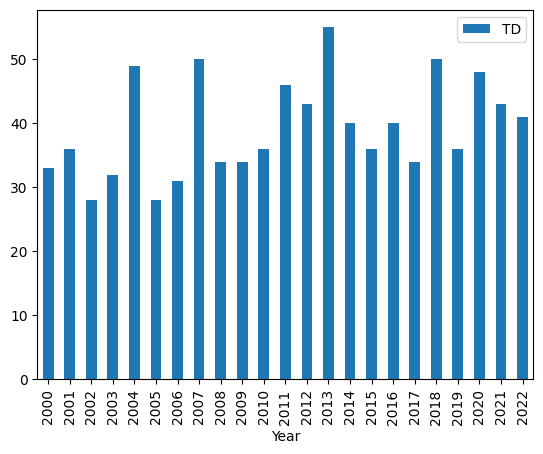

In [274]:
Highest_TD.plot.bar("Year", "TD")
#plot the info with the specified x and y values

In [282]:
stats["TD"].corr(stats["Votes"], method='pearson')
#Find teh correlation between TDs and MVP votes

0.4029921895239382

In [285]:
stats['Share'] = stats['Share'].str.rstrip('%').astype('float') / 100.0
#Need to convert Share from an object to an integer

In [286]:
stats.to_csv("stats.csv")

In [290]:
stats["Share"].corr(stats["TD"], method='pearson')

0.4164667324770607

In [291]:
stats["Share"].corr(stats["W"], method='pearson')

0.3483606495126258

In [292]:
stats["Share"].corr(stats["Cmp%"], method='pearson')

0.22299289496611713

In [293]:
stats.columns
#Look at every column

Index(['Player', 'Tm', 'Age', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds',
       'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G',
       'Rate', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Year',
       'Votes', 'Share', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS',
       'SRS', 'OSRS', 'DSRS'],
      dtype='object')

In [294]:
stats.dtypes

Player     object
Tm         object
Age         int64
G           int64
GS          int64
QBrec      object
Cmp         int64
Att         int64
Cmp%      float64
Yds         int64
TD          int64
TD%       float64
Int         int64
Int%      float64
1D          int64
Lng         int64
Y/A       float64
AY/A      float64
Y/C       float64
Y/G       float64
Rate      float64
Sk          int64
Yds.1       int64
Sk%       float64
NY/A      float64
ANY/A     float64
4QC       float64
GWD       float64
Year        int64
Votes     float64
Share     float64
W           int64
L           int64
W-L%      float64
PF          int64
PA          int64
PD          int64
MoV       float64
SoS       float64
SRS       float64
OSRS      float64
DSRS      float64
dtype: object

In [311]:
stats = stats.fillna(0)

In [312]:
predictors = ['Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds',
       'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G',
       'Rate', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Year',
        'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS',
       'SRS', 'OSRS', 'DSRS']
#These will be used for the machine learning model, only items that are numbers(float/int) were left

In [321]:
train = stats[stats["Year"] < 2022]
#Training data used for every year except the most recent

In [314]:
test = stats[stats["Year"] == 2022]
#Test data for thsi year

In [315]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)
#Machine learning model imported

In [316]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [317]:
predictions = reg.predict(test[predictors])

In [319]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
#The index specifies the row labels of the dataframe as seen below the test data is for the latest season

In [320]:
predictions

,predictions
579,0.209693
580,-0.082072
581,-0.050423
582,0.098391
583,0.128864
584,0.149518
585,0.057455
586,0.035235
587,0.024803
588,0.035956


In [323]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
#Player names and votes share is added to the table to indentify the info better

In [324]:
combination

,Player,Share,predictions
579,Patrick Mahomes,0.980,0.209693
580,Justin Herbert,0.002,-0.082072
581,Tom Brady,0.000,-0.050423
582,Kirk Cousins,0.000,0.098391
583,Jared Goff,0.000,0.128864
584,Josh Allen,0.302,0.149518
585,Geno Smith,0.002,0.057455
586,Trevor Lawrence,0.006,0.035235
587,Jalen Hurts,0.386,0.024803
588,Aaron Rodgers,0.000,0.035956


In [325]:
combination.sort_values("Share", ascending=False).head(15)
#Sort the players in terms of mvp vote share

,Player,Share,predictions
579,Patrick Mahomes,0.980,0.209693
587,Jalen Hurts,0.386,0.024803
584,Josh Allen,0.302,0.149518
586,Trevor Lawrence,0.006,0.035235
603,Justin Fields,0.002,-0.020923
585,Geno Smith,0.002,0.057455
589,Tua Tagovailoa,0.002,0.102606
580,Justin Herbert,0.002,-0.082072
605,Marcus Mariota,0.000,0.010764
604,Lamar Jackson,0.000,0.078503


In [327]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])
#Mean squared error measures the average of the square of the errors. This is given the parameters based on the values we have
#and the values we're trying to find
#Calculates risk, value is low because of the massive vote share by the winner Patrick Mahomes, would be more informative if
#Votes were spread more evenly

0.029679180221509876

In [329]:
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1, combination.shape[0]+1))
#Sort the table by share and assign a rank value to each

In [330]:
combination.head(10)

,Player,Share,predictions,Rk
579,Patrick Mahomes,0.980,0.209693,1
587,Jalen Hurts,0.386,0.024803,2
584,Josh Allen,0.302,0.149518,3
586,Trevor Lawrence,0.006,0.035235,4
603,Justin Fields,0.002,-0.020923,5
585,Geno Smith,0.002,0.057455,6
589,Tua Tagovailoa,0.002,0.102606,7
580,Justin Herbert,0.002,-0.082072,8
605,Marcus Mariota,0.000,0.010764,9
604,Lamar Jackson,0.000,0.078503,10


In [331]:
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0]+1))
#Do the same to find the predicted rank based on the predictions table generated from the prediction metrics

In [332]:
combination.head(10)
#Shows the contrast between the results

,Player,Share,predictions,Rk,Predicted_Rk
579,Patrick Mahomes,0.980,0.209693,1,1
584,Josh Allen,0.302,0.149518,3,2
583,Jared Goff,0.000,0.128864,25,3
589,Tua Tagovailoa,0.002,0.102606,7,4
582,Kirk Cousins,0.000,0.098391,26,5
604,Lamar Jackson,0.000,0.078503,10,6
585,Geno Smith,0.002,0.057455,6,7
588,Aaron Rodgers,0.000,0.035956,24,8
586,Trevor Lawrence,0.006,0.035235,4,9
587,Jalen Hurts,0.386,0.024803,2,10


In [339]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending = False).head(5)
    predicted = combination.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row ["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)
#Need to find the difference between the actual vote share and the predicted vote share
#If the player is found in the correct spot the sum and length will be equal, however if the player is foudn later than expected
#Then the length needed to traverse the list to match will be long and the value will be far away from thge target of 1
#The for index, row in predicted.iterrows() yeilds the index and row as a series

In [340]:
find_ap(combination)
#This is the average for the previous year

0.5837037037037037

In [341]:
years = list(range(2000, 2023))

In [343]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index = test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))
#Do the same with the previous dat

In [344]:
sum(aps) / len(aps)
#This data is less of an accurate predictor than in 2022 alone
#The reason for this is likely that Mahomes being predicted MVP while being the overwhelming winner
#Skewed the data positively while in many years the sats may not predict a winner as accurately

0.45339680709671815

In [346]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis = 1).sort_values(0, ascending=False)
#This shows which metrics have the highest correlation between vote share
#It's not surprising int%, wins, and TDs are important factors but adjusted net yeards per passing attmept
#Being an overwhelming indicator is a bit of a surprise

,0,1
22,0.654497,ANY/A
10,0.087482,Int%
20,0.067571,Sk%
14,0.057183,AY/A
35,0.049841,OSRS
34,0.047367,SRS
36,0.041813,DSRS
26,0.026346,W
7,0.014693,TD
27,0.012521,L
